# Проект SQL

# Анализ базы данных книжного магазина


**Описание:**
Компания купила крупный сервис для чтения книг по подписке, которая содержит информацию о книгах, издательствах, авторах, а также пользовательские обзоры книг. 

____
**Цель исследования:**
Полученные данные должны помочь сформулировать ценностное предложение для нового продукта.
 
_____
**Задачи исследования:**

Проанализировать полученную базу данных - рейтинги, издательства и тд.

1. [**Знакомство с данными**](#start)


2. [**Исследование данных**](#eda)
    * [Задача 1](#01) - книги после 1 января 2000 года
    * [Задача 2](#02) - количество обзоров и средняя оценка для каждой книги
    * [Задача 3](#03) - издательство,выпустившее наибольшее число книг толще 50 страниц
    * [Задача 4](#04) - автор с самой высокой средней оценкой книг с 50 и более оценками
    * [Задача 5](#05) - среднее количество обзоров от пользователей, которые поставили больше 48 оценок
    
        
5. [**Выводы**](#end)

Импортируем нужные библиотеки:

In [2]:
import pandas as pd
import sqlalchemy as sa
from IPython.display import Image

Устанавливаем параметры, сохраняем коннектор чтобы выполнить SQL-запрос, пишем функцию с использованием Pandas:

In [3]:
# устанавливаем параметры
db_config = {
'user': 'praktikum_student', # имя пользователя
'pwd': 'Sdf4$2;d-d30pp', # пароль
'host': 'rc1b-wcoijxj3yxfsf3fs.mdb.yandexcloud.net',
'port': 6432, # порт подключения
'db': 'data-analyst-final-project-db' # название базы данных
}
connection_string = 'postgresql://{user}:{pwd}@{host}:{port}/{db}'.format(**db_config)
# сохраняем коннектор
engine = sa.create_engine(connection_string, connect_args={'sslmode':'require'})
# чтобы выполнить SQL-запрос, пишем функцию с использованием Pandas
def get_sql_data(query:str, engine:sa.engine.base.Engine=engine) -> pd.DataFrame:
    '''
    Открываем соединение, получаем данные из sql, закрываем соединение
    '''
    with engine.connect() as con:
        return pd.read_sql(sql=sa.text(query), con = con)

## Знакомство с данными<a id="eda"></a>

Используем цикл чтобы вывести информацию по всем таблицам, и количество строк в каждой таблице:

In [4]:
for table in ['books', 'authors', 'publishers', 'reviews', 'ratings']:
    query = ''' SELECT * FROM {}'''.format(table)
    df = get_sql_data(query)
    print(f'====={table}=====')
    display(df.head())
    print(df.info())
    print('Количество строк:', len(df))
    print()    

=====books=====


,book_id,author_id,title,num_pages,publication_date,publisher_id
0,1,546,'Salem's Lot,594,2005-11-01,93
1,2,465,1 000 Places to See Before You Die,992,2003-05-22,336
2,3,407,13 Little Blue Envelopes (Little Blue Envelope...,322,2010-12-21,135
3,4,82,1491: New Revelations of the Americas Before C...,541,2006-10-10,309
4,5,125,1776,386,2006-07-04,268


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   book_id           1000 non-null   int64 
 1   author_id         1000 non-null   int64 
 2   title             1000 non-null   object
 3   num_pages         1000 non-null   int64 
 4   publication_date  1000 non-null   object
 5   publisher_id      1000 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 47.0+ KB
None
Количество строк: 1000

=====authors=====


,author_id,author
0,1,A.S. Byatt
1,2,Aesop/Laura Harris/Laura Gibbs
2,3,Agatha Christie
3,4,Alan Brennert
4,5,Alan Moore/David Lloyd


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   author_id  636 non-null    int64 
 1   author     636 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.1+ KB
None
Количество строк: 636

=====publishers=====


,publisher_id,publisher
0,1,Ace
1,2,Ace Book
2,3,Ace Books
3,4,Ace Hardcover
4,5,Addison Wesley Publishing Company


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   publisher_id  340 non-null    int64 
 1   publisher     340 non-null    object
dtypes: int64(1), object(1)
memory usage: 5.4+ KB
None
Количество строк: 340

=====reviews=====


,review_id,book_id,username,text
0,1,1,brandtandrea,Mention society tell send professor analysis. ...
1,2,1,ryanfranco,Foot glass pretty audience hit themselves. Amo...
2,3,2,lorichen,Listen treat keep worry. Miss husband tax but ...
3,4,3,johnsonamanda,Finally month interesting blue could nature cu...
4,5,3,scotttamara,Nation purpose heavy give wait song will. List...


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2793 entries, 0 to 2792
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review_id  2793 non-null   int64 
 1   book_id    2793 non-null   int64 
 2   username   2793 non-null   object
 3   text       2793 non-null   object
dtypes: int64(2), object(2)
memory usage: 87.4+ KB
None
Количество строк: 2793

=====ratings=====


,rating_id,book_id,username,rating
0,1,1,ryanfranco,4
1,2,1,grantpatricia,2
2,3,1,brandtandrea,5
3,4,2,lorichen,3
4,5,2,mariokeller,2


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6456 entries, 0 to 6455
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   rating_id  6456 non-null   int64 
 1   book_id    6456 non-null   int64 
 2   username   6456 non-null   object
 3   rating     6456 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 201.9+ KB
None
Количество строк: 6456



* **Таблица `books` cодержит данные о книгах:**
   - `book_id` — идентификатор книги
   - `author_id` — идентификатор автора
   - `title` — название книги
   - `num_pages` — количество страниц
   - `publication_date` — дата публикации книги
   - `publisher_id` — идентификатор издателя
   

* **Таблица `authors` cодержит данные об авторах:**
   - `author_id` — идентификатор автора
   - `author` — имя автора
   
   
* **Таблица `publishers` cодержит данные об издательствах:**
    - `publisher_id` — идентификатор издательства
    - `publisher` — название издательства


* **Таблица `ratings` cодержит данные о пользовательских оценках книг:**
    - `rating_id` — идентификатор оценки
    - `book_id` — идентификатор книги
    - `username` — имя пользователя, оставившего оценку
    - `rating` — оценка книги


* **Таблица `reviews` cодержит данные о пользовательских обзорах:**
    - `review_id` — идентификатор обзора
    - `book_id` — идентификатор книги
    - `username` — имя автора обзора
    - `text` — текст обзора

**ER-диаграмма базы данных:**

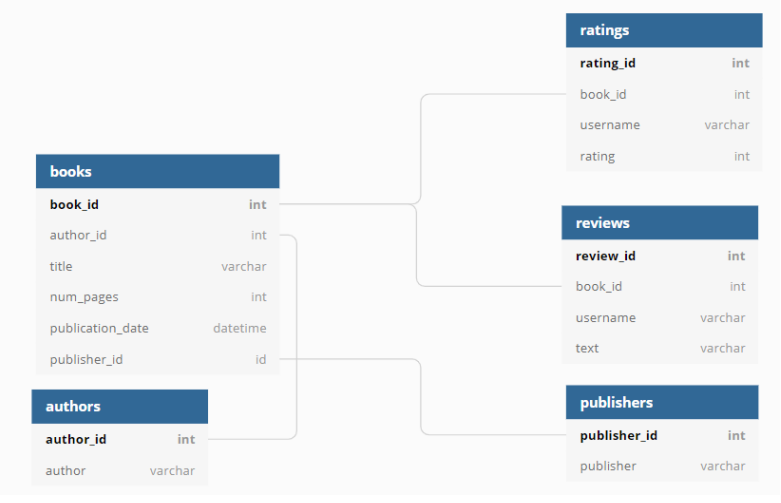

In [8]:
Image(filename="C:/Users/admin/Downloads/Practicum/Projects/15.3_final_SQL/screen_er.png")

## Исследовательский анализ:<a id="eda"></a>

**Задача 1**<a id="01"></a>

* **Посчитать, сколько книг вышло после 1 января 2000 года**

In [4]:
first = '''
SELECT COUNT(*)
FROM books
WHERE publication_date > '2000-01-01'
'''
get_sql_data(first)

,count
0,819


После 1 января 2000 года вышло 819 книг

**Задача 2**<a id="02"></a>

* **Для каждой книги посчитать количество обзоров и среднюю оценку**

In [5]:
second = '''
SELECT b.book_id,
       b.title,
       COUNT(DISTINCT rv.review_id) cnt_rev,
       ROUND(AVG(rt.rating),2) avg_rt
FROM books b LEFT JOIN reviews rv ON b.book_id = rv.book_id
LEFT JOIN ratings rt ON rv.book_id = rt.book_id
GROUP BY b.book_id, b.title
ORDER BY cnt_rev DESC
'''
get_sql_data(second)

,book_id,title,cnt_rev,avg_rt
0,948,Twilight (Twilight #1),7,3.66
1,963,Water for Elephants,6,3.98
2,734,The Glass Castle,6,4.21
3,302,Harry Potter and the Prisoner of Azkaban (Harr...,6,4.41
4,695,The Curious Incident of the Dog in the Night-Time,6,4.08
...,...,...,...,...
995,83,Anne Rice's The Vampire Lestat: A Graphic Novel,0,NaN
996,808,The Natural Way to Draw,0,NaN
997,672,The Cat in the Hat and Other Dr. Seuss Favorites,0,NaN
998,221,Essential Tales and Poems,0,NaN


Добавили колонки с количеством ревью и средним рейтингом по пользователям. Наибольшее количество ревью у Сумерек, средняя оценка не самая высокая.

**Задача 3**<a id="03"></a>

* **Определить издательство, которое выпустило наибольшее число книг толще 50 страниц** — так мы исключим из анализа брошюры

In [6]:
third = '''
SELECT COUNT(b.book_id) AS books,
       p.publisher    
FROM publishers AS p LEFT JOIN books b ON p.publisher_id = b.publisher_id
WHERE b.num_pages > 50
GROUP BY p.publisher_id
ORDER BY 1 DESC
LIMIT 1
'''
get_sql_data(third)

,books,publisher
0,42,Penguin Books


На первом месте издательство Penguin Books - 42 книги, не считая брошюр.

**Задача 4**<a id="04"></a>

* **Определить автора с самой высокой средней оценкой книг, учитывая только книги с 50 и более оценками**

In [7]:
forth = '''
SELECT a.author,
       ROUND(AVG(rt.rating),1)
FROM books b LEFT JOIN authors a ON a.author_id = b.author_id
LEFT JOIN ratings rt ON b.book_id = rt.book_id
WHERE rt.book_id IN (SELECT book_id
                      FROM ratings
                      GROUP BY book_id
                      HAVING COUNT(rating_id) >= 50)
GROUP BY a.author_id
ORDER BY 2 DESC
LIMIT 1
'''
get_sql_data(forth)

,author,round
0,J.K. Rowling/Mary GrandPré,4.3


Автор с самым высоким рейтингом - Джоан Роулинг.

**Задача 5**<a id="05"></a>

* **Посчитать среднее количество обзоров от пользователей, которые поставили больше 48 оценок**

In [8]:
fifth = '''
SELECT AVG(cnt)
FROM (SELECT COUNT(review_id) AS cnt
      FROM reviews
      WHERE username in (SELECT username
                         FROM ratings
                         GROUP BY username
                         HAVING COUNT(rating) > 48)
      GROUP BY username) as avg
'''
get_sql_data(fifth)

,avg
0,24.0


В среднем, пользователи, которые поставили больше 48 оченок, пишут 24 обзора.

## Выводы<a id="end"></a>

* После 1 января 2000 года вышло 819 книг
* В среднем, книгам с самым большим количеством ревью ставят не самые высокие оценки. Наибольшее количество ревью у Сумерек - 7, средняя оценка - 3.6
* Издательство, которое выпустило наибольшее число книг - Penguin Books - 42 книги, не считая брошюр.
* Автор с самым высоким рейтингом - Джоан Роулинг - 4.3
* Пользователи, которые поставили больше 48 оченок, пишут в среднем 24 обзора.